In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('50_Startups.csv')

In [4]:
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [5]:
df.dtypes

R&D Spend          float64
Administration     float64
Marketing Spend    float64
State               object
Profit             float64
dtype: object

In [6]:
TotalSpend = df['R&D Spend'] + df['Administration'] + df['Marketing Spend']
df['TotalSpend'] = TotalSpend

In [7]:
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit,TotalSpend
0,165349.20,136897.80,471784.10,New York,192261.83,774031.10
1,162597.70,151377.59,443898.53,California,191792.06,757873.82
2,153441.51,101145.55,407934.54,Florida,191050.39,662521.60
3,144372.41,118671.85,383199.62,New York,182901.99,646243.88
4,142107.34,91391.77,366168.42,Florida,166187.94,599667.53


In [8]:
num_df = df.select_dtypes(include=['float64', 'int64'])
obj_df = df.select_dtypes(include=['object'])

In [9]:
def outliers(df, ft):
    q1 = df[ft].quantile(0.25)
    q3 = df[ft].quantile(0.75)
    iqr = q3 - q1
    ub = q3 + 1.5 * iqr
    lb = q1 - 1.5 * iqr
    ls = df.index[(df[ft] > ub) | (df[ft] < lb)]
    return ls

def replace_outliers_with_mean(df, ft):
    q1 = df[ft].quantile(0.25)
    q3 = df[ft].quantile(0.75)
    iqr = q3 - q1
    ub = q3 + 1.5 * iqr
    lb = q1 - 1.5 * iqr

    outliers_indices = df.index[(df[ft] >= ub) | (df[ft] <= lb)]


    df.loc[outliers_indices, ft] = df[ft].mean()

    return df

index_ls = []

for i in num_df.columns:
    index_ls.extend(outliers(num_df, i))
print(index_ls)

for i in num_df.columns:
    df = replace_outliers_with_mean(num_df, i)

[49]


In [10]:
#label encoding
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
label_obj_df = obj_df.apply(labelencoder.fit_transform)

In [11]:
#concat label_obj_df and num_df
final_df = pd.concat([label_obj_df, num_df], axis=1)

C:\Users\Ashish Gaurav\AppData\Local\Temp\ipykernel_20004\1268406852.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(final_df)


<Axes: ylabel='Density'>

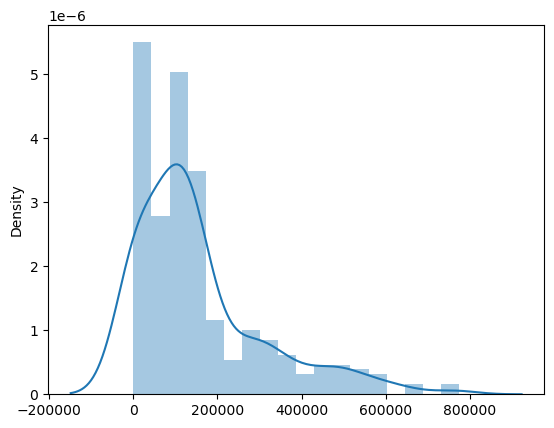

In [12]:
sns.distplot(final_df)

In [13]:
#multi linear regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

X = final_df.drop('Profit', axis=1)
y = final_df['Profit']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [14]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [15]:
y_pred = regressor.predict(X_test)

print('Coefficients: \n', regressor.coef_)

Coefficients: 
 [-2.06344457e+03  5.13283694e-01 -1.47197411e-01 -1.68498112e-01
  1.97588153e-01]


In [16]:
print('Mean squared error: %.2f' % mean_squared_error(y_test, y_pred))

Mean squared error: 82191675.94


In [17]:
print('Coefficient of determination: %.2f' % r2_score(y_test, y_pred))

Coefficient of determination: 0.94


In [18]:
#r2 score
r2_score(y_test, y_pred)

0.9357321008344291

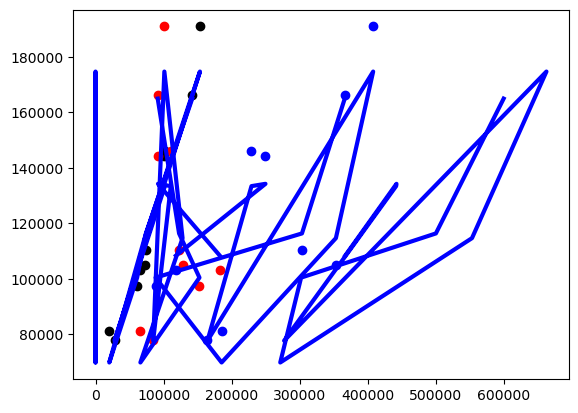

In [19]:
#plotting the graph with slope for multi linear regression
plt.scatter(X_test['R&D Spend'], y_test, color='black')
plt.scatter(X_test['Administration'], y_test, color='red')
plt.scatter(X_test['Marketing Spend'], y_test, color='blue')
plt.plot(X_test, y_pred, color='blue', linewidth=3)

<Axes: >

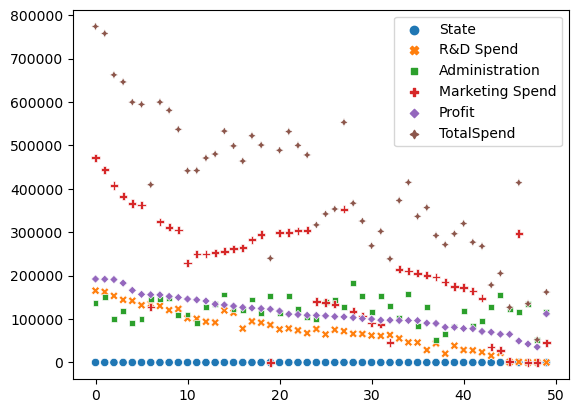

In [20]:
sns.scatterplot(final_df)

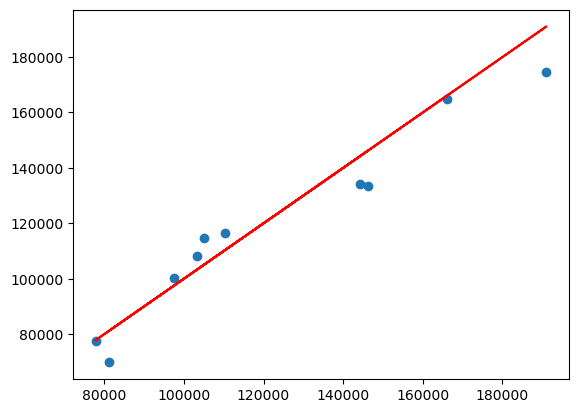

In [21]:
plt.scatter(y_test, y_pred)
plt.plot(y_test, y_test, color='red')

In [23]:
adjustedr2 = 1 - (1-r2_score(y_test, y_pred)) * (len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
adjustedr2

0.8553972268774656